# In This part
## 1-Contours
## 2-Moments, Sorting, Approximating & Matching Contours
## 3-blob detection
## 4-Counting Circles, Ellipses and Finding Waldo
## 5-Finding Corners

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show(image=None,string='',size=10):
  width,hight=image.shape[:2]
  asp=width/hight
  plt.figure(figsize=(asp*size,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(string)
  plt.show()
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-04-22 11:57:10--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.50
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  28.22M  12.5MB/s    in 2.3s    

2023-04-22 11:57:13 (12.5 MB/s) - ‘images.zip.1’ saved [29586716/29586716]

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


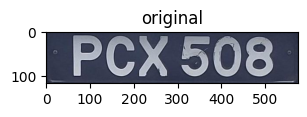

In [2]:
image = cv2.imread('images/LP.jpg')
show(image,"original",16)

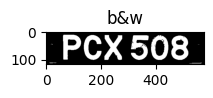

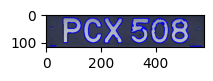

the count of counter is 38


In [3]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))

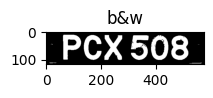

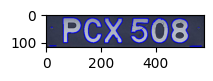

the count of counter is 16


In [4]:
image = cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))

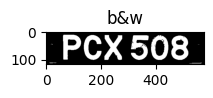

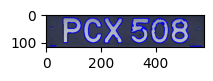

the count of counter is 38


In [5]:
image = cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))

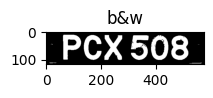

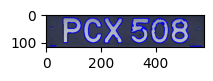

the count of counter is 38


In [6]:
image = cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))

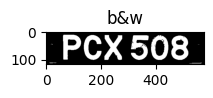

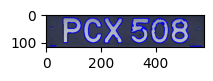

the count of counter is 38


In [7]:
image = cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))

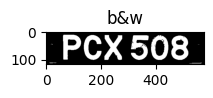

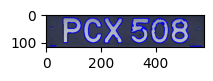

the count of counter is 38
8
10
7
1
1
1
1
4
2
1
114
40
6
37
6
4
8
172
6
4
4
6
6
15
11
121
6
6
8
57
8
7
170
4
4
164
65
27


In [8]:
image = cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))
for co in cou:
  print(len(co))

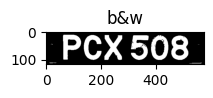

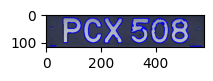

the count of counter is 38
87
50
7
1
1
1
1
4
2
1
236
80
6
75
10
4
8
426
6
4
4
10
14
21
17
241
6
14
15
155
14
9
358
4
4
347
272
92


In [9]:
image = cv2.imread('images/LP.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr,"b&w")
cou,_=cv2.findContours(thr,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,cou,-1,(255,0,0),2)
show(image)
print("the count of counter is {}".format(len(cou)))
for co in cou:
  print(len(co))

In [10]:
def put_label(counter,image):
  for (i,co) in enumerate(counter):
    M=cv2.moments(co)
    x=int(M["m10"]/M["m00"])
    y=int(M["m01"]/M["m00"])
    cv2.putText(image,str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
  return image


In [11]:
def put_circule(counter,image):
  for (i,co) in enumerate(counter):
    M=cv2.moments(co)
    x=int(M["m10"]/M["m00"])
    y=int(M["m01"]/M["m00"])
    cv2.circle(image,(x,y), 10, (0,0,255), -1)
  return image


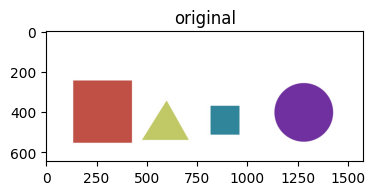

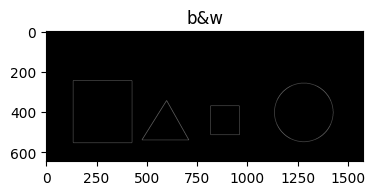

4


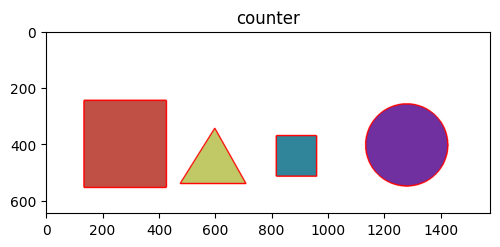

4


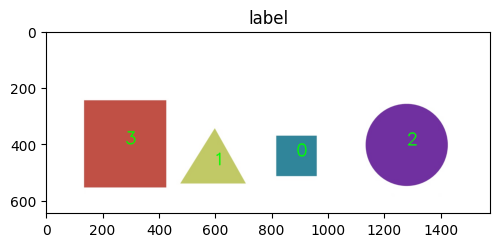

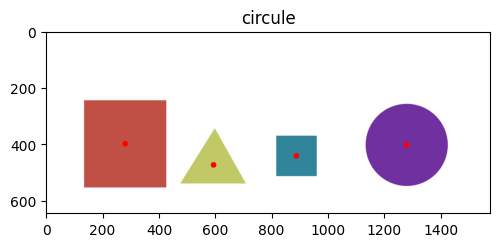

In [12]:
from pickle import TRUE
image = cv2.imread('images/bunchofshapes.jpg')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
show(image,"original")
new=cv2.Canny(gray,50,200)
show(new,"b&w")
cou,_=cv2.findContours(new,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
print(len(cou))
image1=image.copy()
cv2.drawContours(image1,cou,-1,(0,0,255),3)
show(image1,"counter",14)
counter_sorted=sorted(cou,key=cv2.contourArea,reverse=True)
print(len(counter_sorted))
show(put_label(cou,image.copy()),"label",14)
show(put_circule(cou,image.copy()),"circule",14)

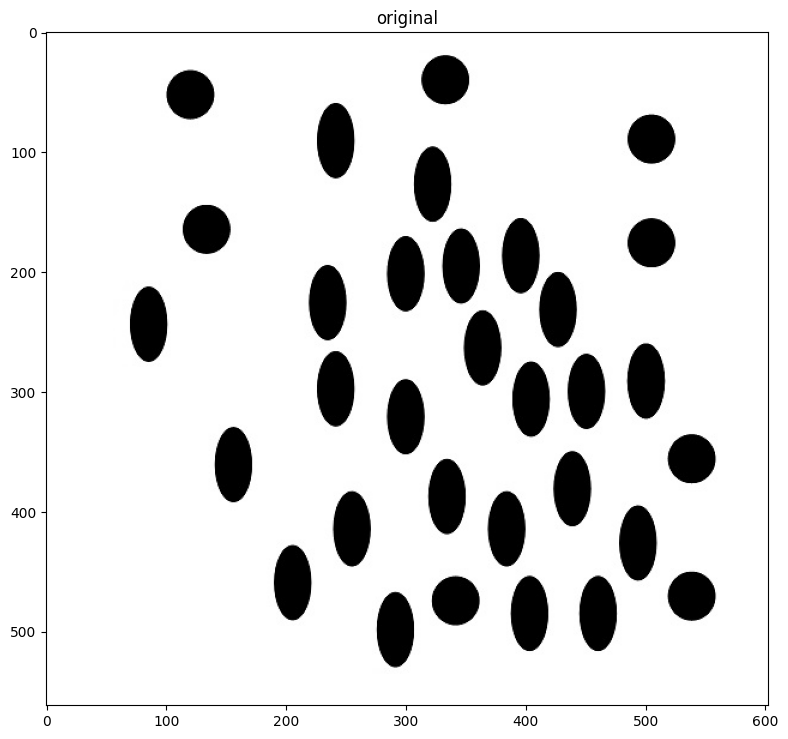

In [13]:
image = cv2.imread("images/blobs.jpg", 0)
show(image,"original")

the key point that has been detected  8


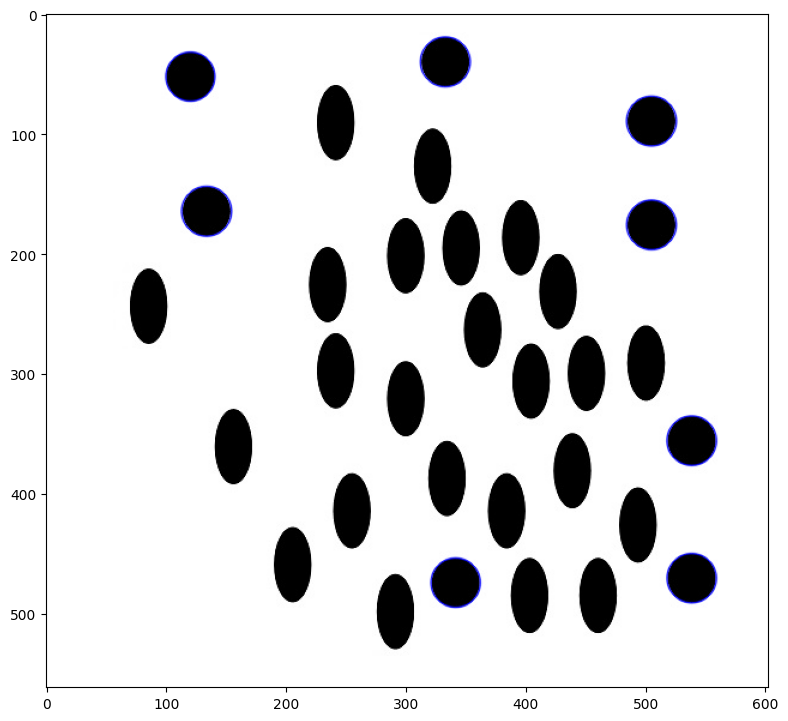

In [14]:
params=cv2.SimpleBlobDetector_Params()
params.filterByArea=True
params.minArea=100

params.filterByCircularity=True
params.minCircularity=0.9

params.filterByConvexity=False
params.minConvexity = 0.2

params.filterByInertia=True
params.minInertiaRatio=0.01

detector=cv2.SimpleBlobDetector_create(params)

keypoint=detector.detect(image)
print("the key point that has been detected  {}".format(len(keypoint)))

SK=cv2.drawKeypoints(image,keypoint,np.zeros((2,2)),(255,0,0),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


show(SK)

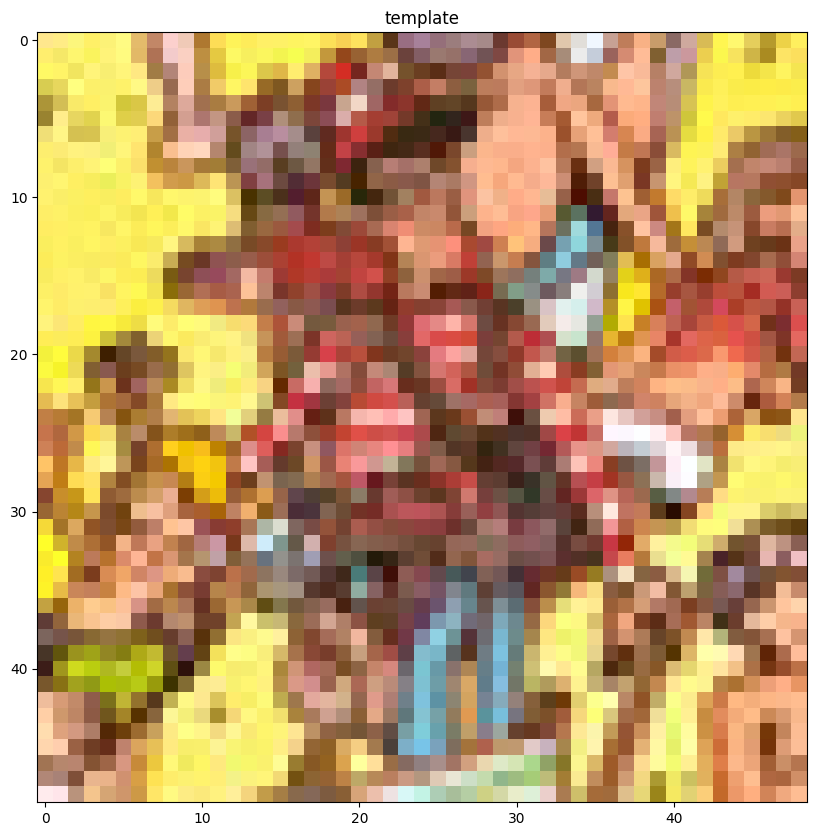

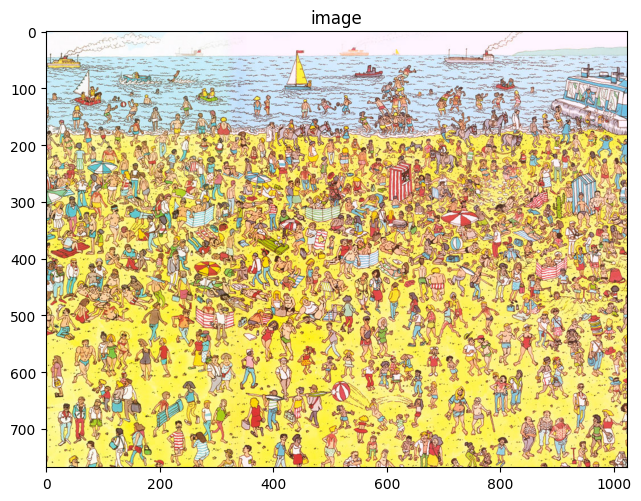

In [15]:
template = cv2.imread('./images/waldo.jpg')
show(template,"template")
image = cv2.imread('./images/WaldoBeach.jpg')
show(image,"image")

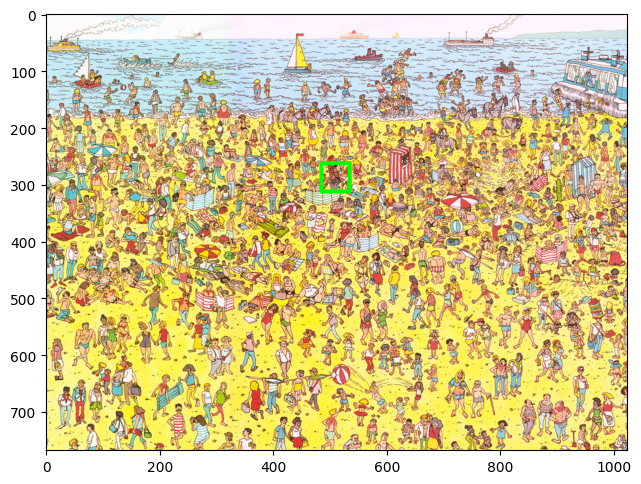

In [16]:
result=cv2.matchTemplate(image,template,cv2.TM_CCOEFF)
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,255,0), 5)
show(image)

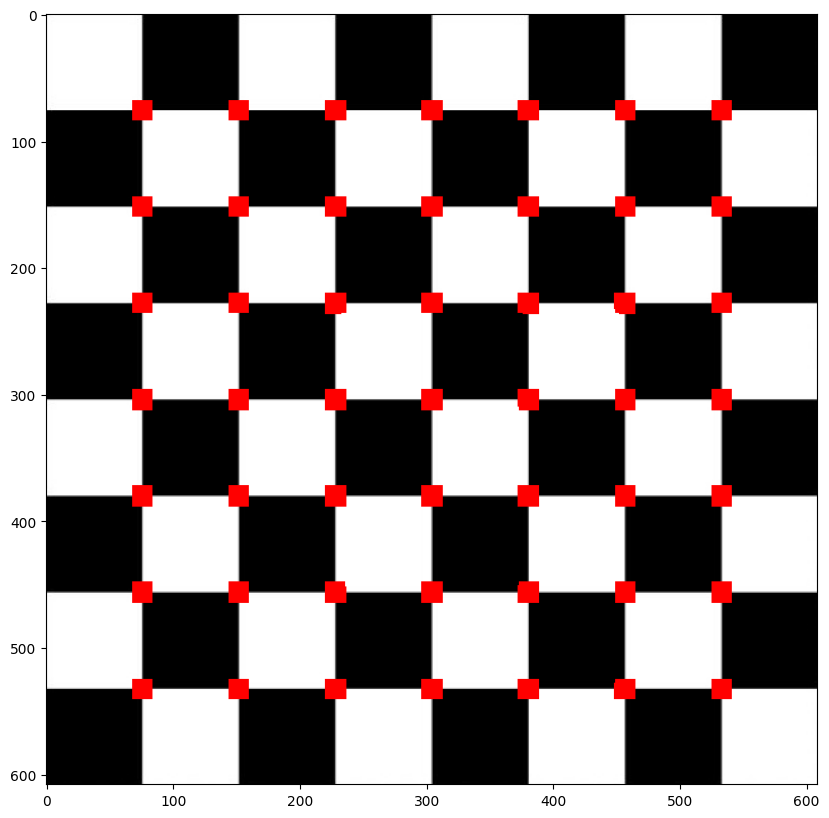

In [17]:
image = cv2.imread('images/chess.JPG')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

corners=cv2.cornerHarris(gray,3,3,0.05)

corner=cv2.dilate(corners,np.ones((7,7),np.uint8),iterations=2)

image[corner>0.025*corner.max()]=[0,0,255]
show(image)

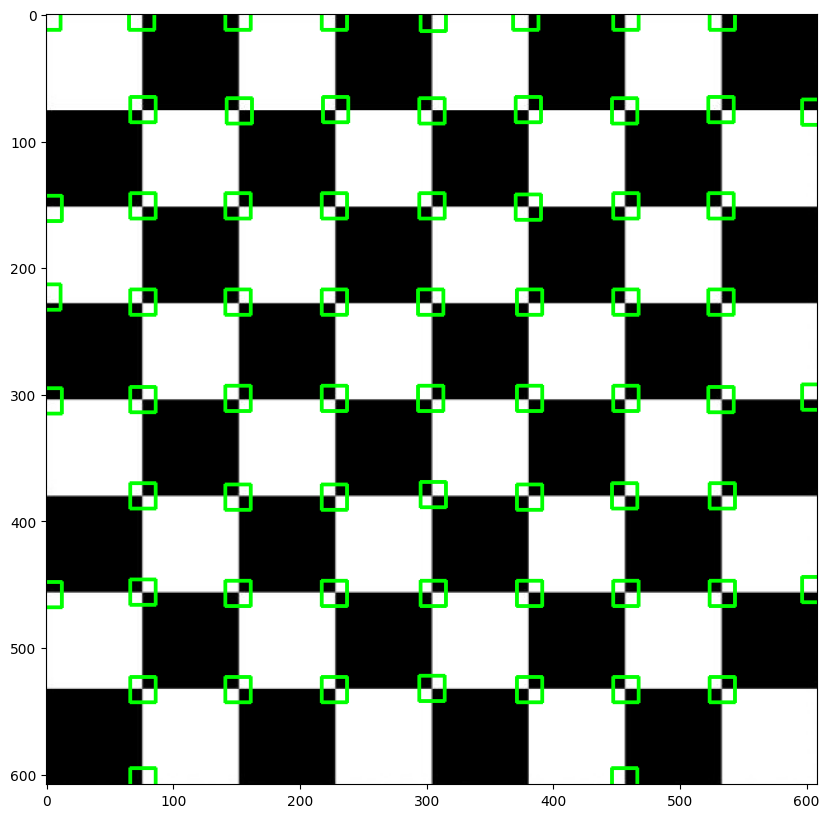

In [18]:
image = cv2.imread('images/chess.JPG')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


corner=cv2.goodFeaturesToTrack(gray,150,0.0005,10)
for c in corner:
  x,y=c[0]
  x=int(x)
  y=int(y)
  cv2.rectangle(image,(x-10,y-10),(x+10,y+10),(0,255,0),2)
show(image)